In [54]:
import numpy as np
pi = np.pi 
cos = np.cos
randint = np.random.randint
randfloat = np.random.uniform
randperm = np.random.permutation
import matplotlib.pyplot as plt

In [55]:
class Problem:
    
    #Rastrigin Function
    x_low = -5.12
    x_up = 5.12
    n = 2
    
    def rastrigin(x):
        A = 10
        n = 2
        sigma = 0
        
        for i in range(n):
            sigma = sigma + x[i]**2 - A*cos(2*pi*x[i])
        
        return A*n+sigma

In [56]:
class DE:
    
    def __init__(self, Np, D):
        
        #generate matrix X with Np x D dimension. (Vector of solutions)
        self.X = np.random.uniform(Problem.x_low, Problem.x_up, size=(Np,D)) 
        
        #Vector U and Vector V
        self.U = np.empty([Np,D]) #Vector after crossover
        self.V = np.empty([Np,D]) #Vector after mutation
        
        #fitness value
        self.fitness = [] #fitness value of every individual
        for i in range (Np):
            self.fitness.append(0)
        
    def fitness_function(self, Np): #
        for i in range (Np):
            self.fitness[i] = Problem.rastrigin(self.X[i]) #evaluate fitness
          
    def mutation(self, Np, F, D):
        for i in range (Np):
            
            R = randperm(Np) #random permutation
            j = R[0] #choose 1st random number
            k = R[1] #choose 2nd random number
            l = R[2] #choose 3rd random number

            #maintain so it won't choose same index as current Vector
            if(j==i):
                j=R[3]
            elif(k==i):
                k=R[3]
            elif(l==i):
                l=R[3]

            self.V[i] = self.X[j] + F*(self.X[k] - self.X[l]) #mutant vector

            for j in range (D): #Maintain Vector V not to exceed boundary
                if(self.V[i][j] > Problem.x_up):
                    self.V[i][j] = Problem.x_up #upper bound
                if(self.V[i][j] < Problem.x_low):
                    self.V[i][j] = Problem.x_low #lower bound

    def crossover(self, Np, Cr, D):
        for i in range (Np):
            jrand = math.floor(randfloat()*D) #jrand
            for j in range (D):
                if(randfloat() <= Cr or j == jrand): 
                    self.U[i][j] = self.V[i][j] #crossover occurs
                else:
                    self.U[i][j] = self.X[i][j] #crossover doesn't occur
                
    def selection(self, Np):
        for i in range (Np):
            if(Problem.rastrigin(self.U[i]) < Problem.rastrigin(self.X[i])): #evaluation (minimizing)
                self.X[i] = self.U[i] #updating Vector X
                self.fitness_function(Np) #calculate fitness

----------------- INITIAL POPULATION ---------------------------


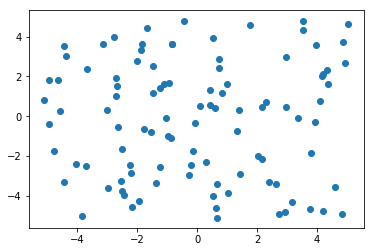

-------------------- ITERATION #1 ---------------------------


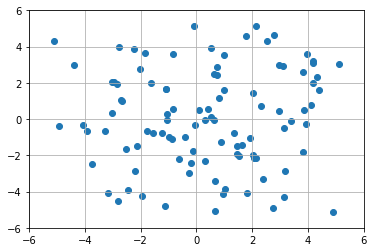

-------------------- ITERATION #2 ---------------------------


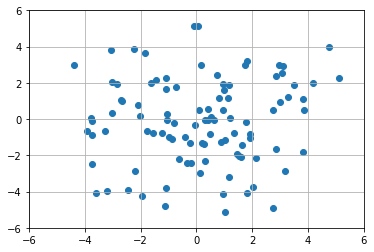

-------------------- ITERATION #3 ---------------------------


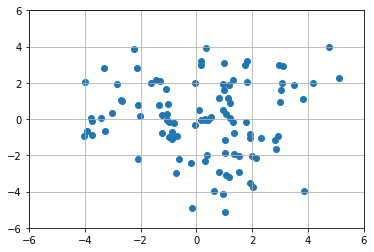

-------------------- ITERATION #4 ---------------------------


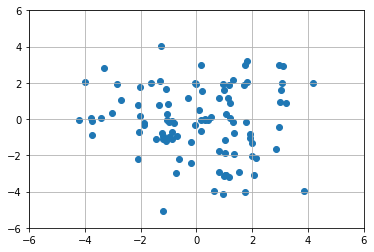

-------------------- ITERATION #5 ---------------------------


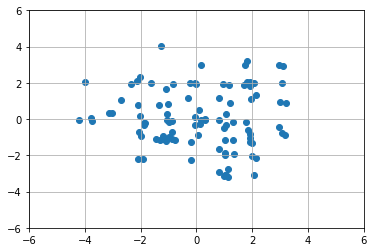

-------------------- ITERATION #6 ---------------------------


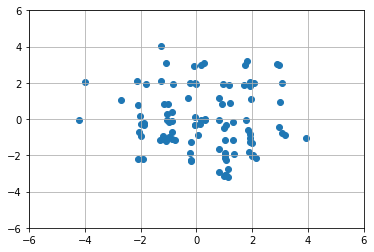

-------------------- ITERATION #7 ---------------------------


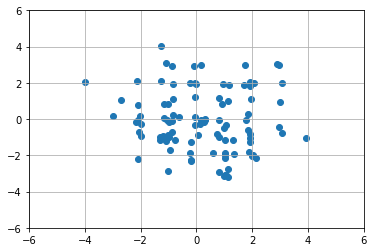

-------------------- ITERATION #8 ---------------------------


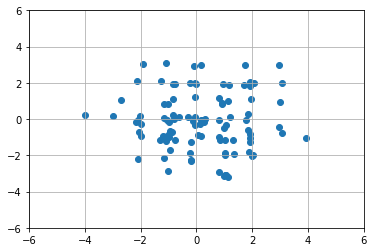

-------------------- ITERATION #9 ---------------------------


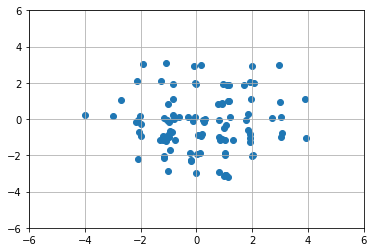

-------------------- ITERATION #10 ---------------------------


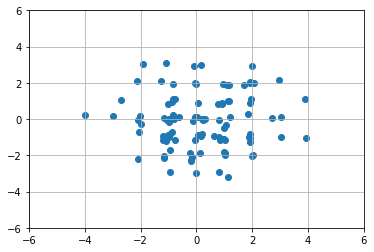

-------------------- ITERATION #11 ---------------------------


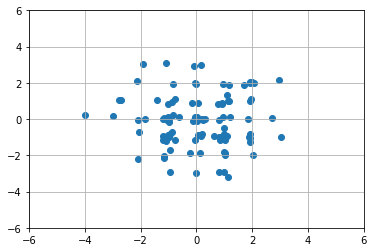

-------------------- ITERATION #12 ---------------------------


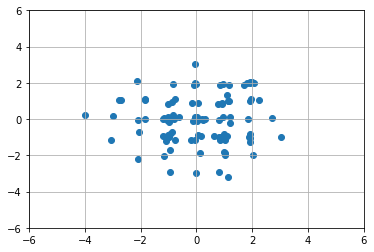

-------------------- ITERATION #13 ---------------------------


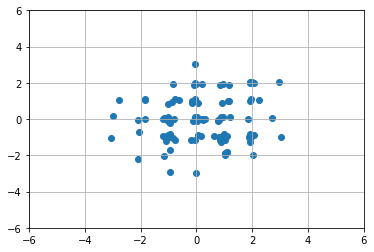

-------------------- ITERATION #14 ---------------------------


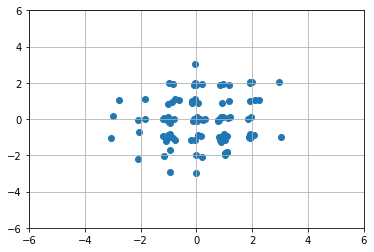

-------------------- ITERATION #15 ---------------------------


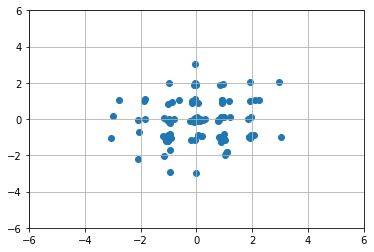

-------------------- ITERATION #16 ---------------------------


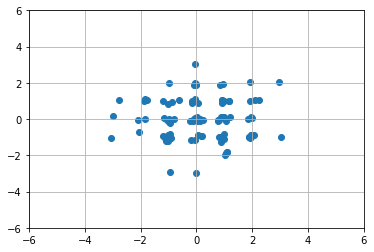

-------------------- ITERATION #17 ---------------------------


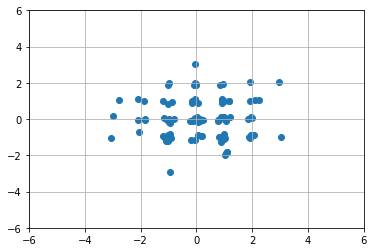

-------------------- ITERATION #18 ---------------------------


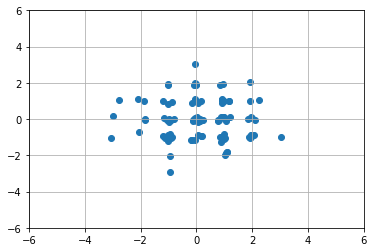

-------------------- ITERATION #19 ---------------------------


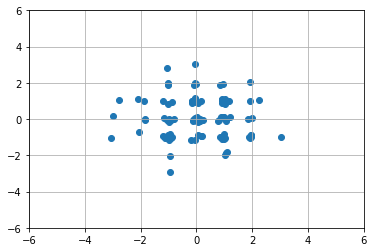

-------------------- ITERATION #20 ---------------------------


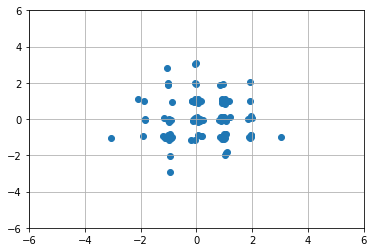

-------------------- ITERATION #21 ---------------------------


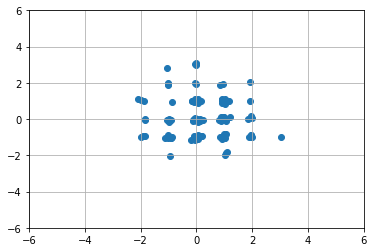

-------------------- ITERATION #22 ---------------------------


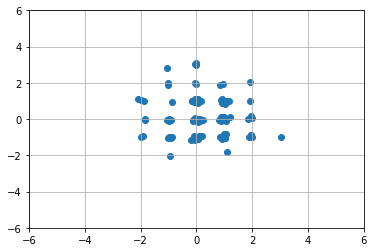

-------------------- ITERATION #23 ---------------------------


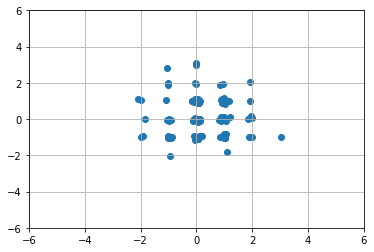

-------------------- ITERATION #24 ---------------------------


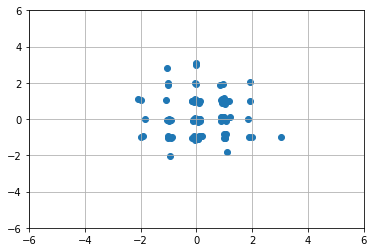

-------------------- ITERATION #25 ---------------------------


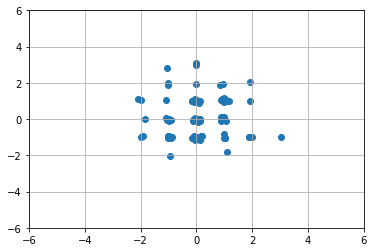

-------------------- ITERATION #26 ---------------------------


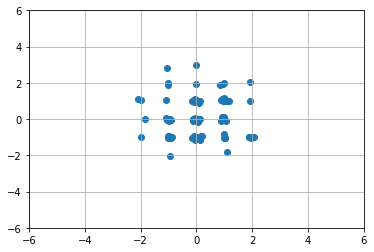

-------------------- ITERATION #27 ---------------------------


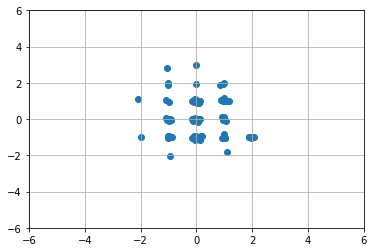

-------------------- ITERATION #28 ---------------------------


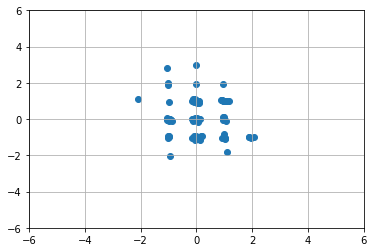

-------------------- ITERATION #29 ---------------------------


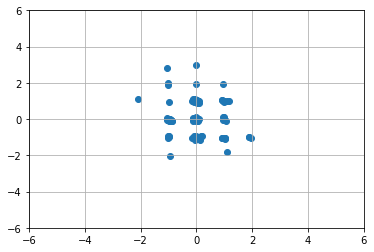

-------------------- ITERATION #30 ---------------------------


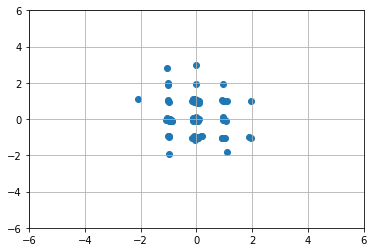

-------------------- ITERATION #31 ---------------------------


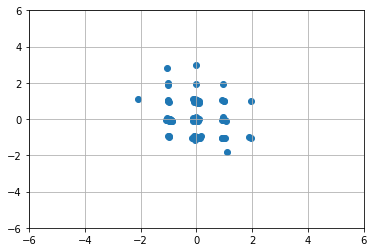

-------------------- ITERATION #32 ---------------------------


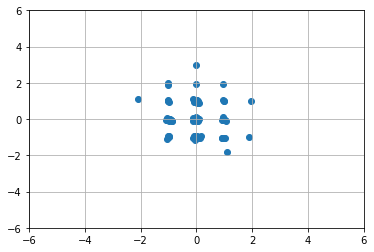

-------------------- ITERATION #33 ---------------------------


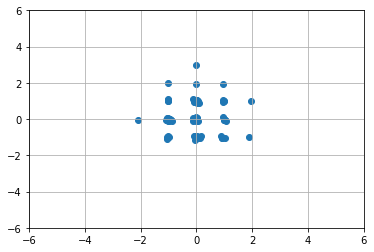

-------------------- ITERATION #34 ---------------------------


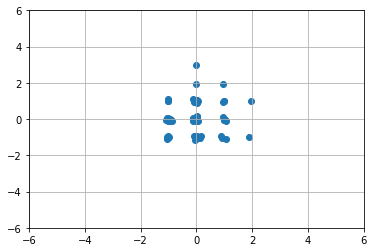

-------------------- ITERATION #35 ---------------------------


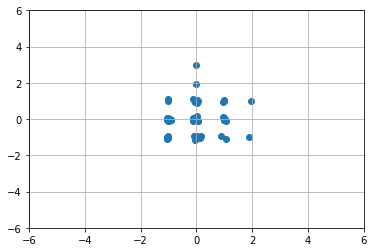

-------------------- ITERATION #36 ---------------------------


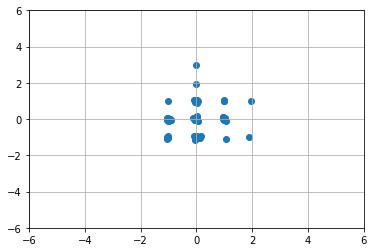

-------------------- ITERATION #37 ---------------------------


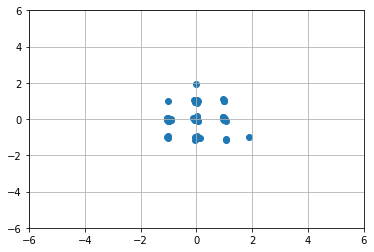

-------------------- ITERATION #38 ---------------------------


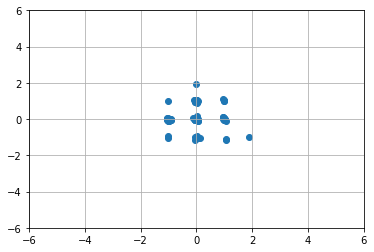

-------------------- ITERATION #39 ---------------------------


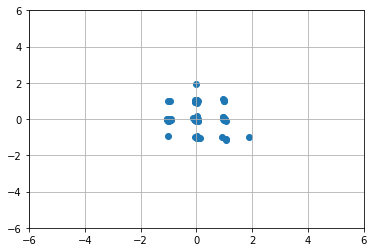

-------------------- ITERATION #40 ---------------------------


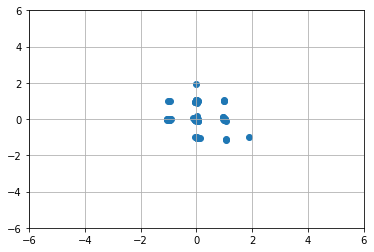

-------------------- ITERATION #41 ---------------------------


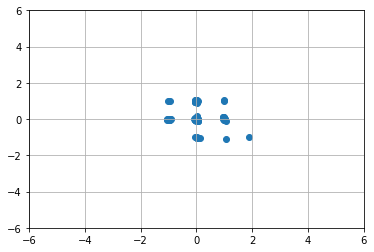

-------------------- ITERATION #42 ---------------------------


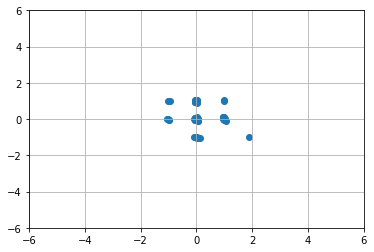

-------------------- ITERATION #43 ---------------------------


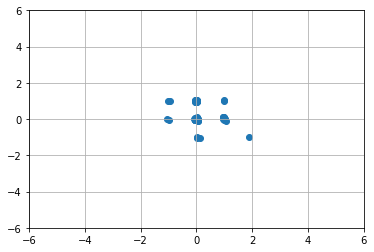

-------------------- ITERATION #44 ---------------------------


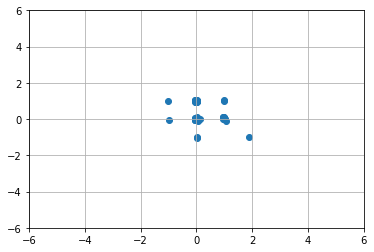

-------------------- ITERATION #45 ---------------------------


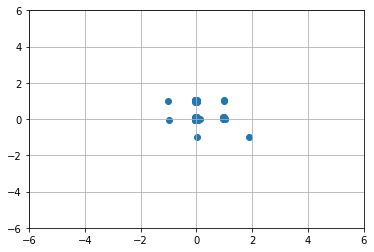

-------------------- ITERATION #46 ---------------------------


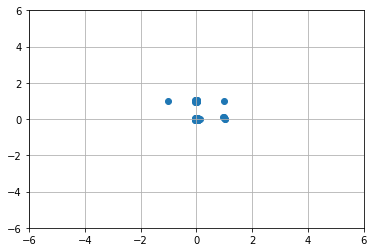

-------------------- ITERATION #47 ---------------------------


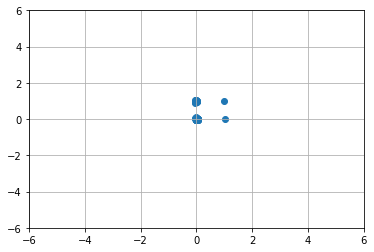

-------------------- ITERATION #48 ---------------------------


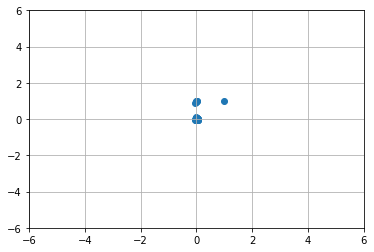

-------------------- ITERATION #49 ---------------------------


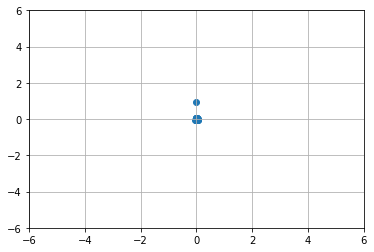

-------------------- ITERATION #50 ---------------------------


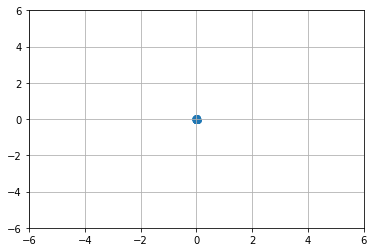

In [57]:
D = Problem.n #number of decision variable or dimension
Np = 100 #number of population
Cr = 0.9 #probability of crossover
F = 0.5 #probability of mutation

de = DE(Np,D)
#print(de.X)
print("----------------- INITIAL POPULATION ---------------------------")
plt.scatter([row[0] for row in de.X],[row[1] for row in de.X])
plt.show()
for i in range (50):
    de.mutation(Np, F, D)
    de.crossover(Np, Cr, D)
    de.selection(Np)
    #print(de.X)
    
    print ("-------------------- ITERATION #"+str(i+1)+" ---------------------------")
    plt.scatter([row[0] for row in de.X],[row[1] for row in de.X])
    plt.ylim(-6,6)
    plt.xlim(-6,6)
    plt.grid()
    plt.show()
